In [1]:
import math

## FIND EQUATION OF LINE GIVEN TWO POINTS
# given a start and end point, this returns the standard form coefficients for a straight line between the two points
# used to find the equation of the target straight lines for a reach
def findEquationOfLine(startPoint, endPoint):
    x = (startPoint[0], endPoint[0]) # x value of the starting and ending point of the trajectory
    y = (startPoint[1], endPoint[1]) # y value of the starting and ending point of the trajectory
    slopeInterceptCoefficients = np.polyfit(x, y, 1) #fits a polynomial of degree 1 (linear) to the points
    # returns y = ax + c; therefore, ax -y + c = 0; so b = -1
    a = slopeInterceptCoefficients[0]
    b = -1
    c = slopeInterceptCoefficients[1]
    standardCoefficients = [a, b, c]
    return standardCoefficients

## FIND THE DEVIATION OF A CURVE FROM A STRAIGHT LINE FOR A LIST OF TRAJECTORIESS
# this finds the deviation for each point in the trajectory
def findDeviationFromStraightLine(targetsArr, resultsArr):
    listDeviations = []
    for i in range(len(resultsArr[:,0,0])):
        # find the target straight line equation
        currStartPoint = targetsArr[i,0,0:2]
        currEndPoint = targetsArr[i,-1,0:2]
        standardCoefficients = findEquationOfLine(currStartPoint, currEndPoint)
        a = standardCoefficients[0]
        b = standardCoefficients[1]
        c = standardCoefficients[2]

        # find the trajectory of the current reach
        currReach = resultsArr[i, :, 0:2]

        # find how far each point in the trajectory 
        currDeviationArr = []
        for j in range(len(currReach[:,0])):
            x1 = currReach[j,0]
            y1 = currReach[j, 1]

            #equation of a line is ax + by + c = 0
            currDist = (abs(a*x1 + b*y1 + c)) / math.sqrt(a*a + b*b)
            currDeviationArr.append(currDist)

        listDeviations.append(currDeviationArr)
    return listDeviations

In [2]:
## OPENING THE CURRENT PARTICIPANT'S DATA
import numpy as np

# opens the targets and results for the specified participant
def openAllFilesForParticipant(trialNumber):
    endOfFileName = "_" + str(trialNumber) + ".npy"
    resultsNF1 = np.load("save_NF1/cartesian_position" + endOfFileName)
    targetsNF1 = np.load("save_NF1/targets" + endOfFileName)

    resultsCF1 = np.load("save_CF1/cartesian_position" + endOfFileName)
    targetsCF1 = np.load("save_CF1/targets" + endOfFileName)

    resultsNF2 = np.load("save_NF2/cartesian_position" + endOfFileName)
    targetsNF2 = np.load("save_NF2/targets" + endOfFileName)

    resultsCF2 = np.load("save_CF2/cartesian_position" + endOfFileName)
    targetsCF2 = np.load("save_CF2/targets" + endOfFileName)

    return resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2

In [3]:
## visualize the curves per participant
import matplotlib.pyplot as plt

## creates figures for a participant containing the last 8 reaches for that condition
def plotCurvesForParticipant(participantNumber, resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 ):
    plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

    ## NF1 figure
    target_xy = targetsNF1 
    xy = resultsNF1[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(141)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('NF1')

    ## CF1 figure
    target_xy = targetsCF1 
    xy = resultsCF1[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(142)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('CF1')

    #NF2 figure
    target_xy = targetsNF2 
    xy = resultsNF2[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(143)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('NF2')

    #CF2 figure
    target_xy = targetsCF2 
    xy = resultsCF2[-8:,:,:] ####
    target_x = target_xy[:, -1, 0]
    target_y = target_xy[:, -1, 1]    
    plt.subplot(144)
    plt.scatter(target_x, target_y)
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)
    for i in range(8):
        plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
    plt.xlabel('CF2')

    plt.suptitle("Participant # " + str(participantNumber))



In [4]:

# this finds the 
def findMaxDeviationsForParticipant(deviationsNF1, deviationsCF1, deviationsNF2, deviationsCF2):
    listMaxNF1 = []
    for i in range(len(deviationsNF1)):
        listMaxNF1.append(max(deviationsNF1[i]))

    listMaxCF1 = []
    for i in range(len(deviationsCF1)):
        listMaxCF1.append(max(deviationsCF1[i]))

    listMaxNF2 = []
    for i in range(len(deviationsNF2)):
        listMaxNF2.append(max(deviationsNF2[i]))

    listMaxCF2 = []
    for i in range(len(deviationsCF2)):
        listMaxCF2.append(max(deviationsCF2[i]))

    return listMaxNF1, listMaxCF1, listMaxNF2, listMaxCF2

    
    


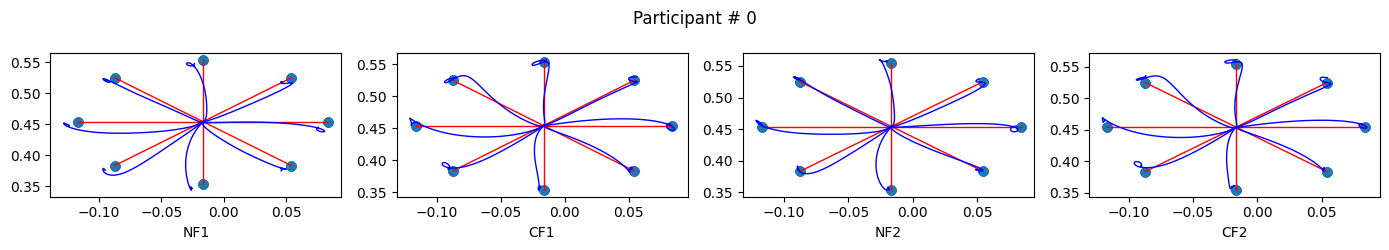

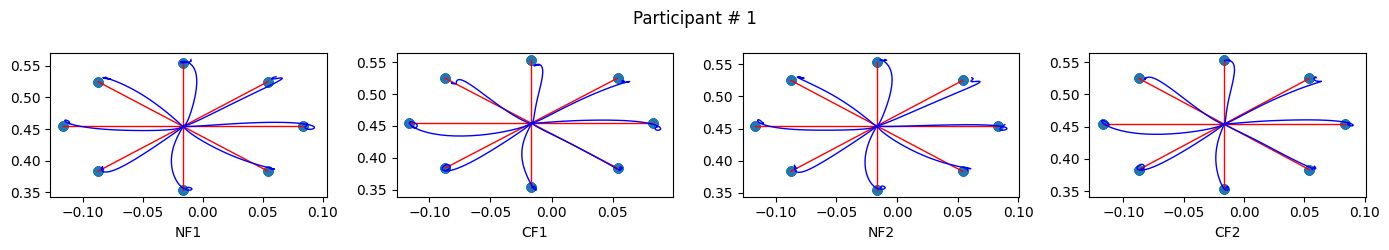

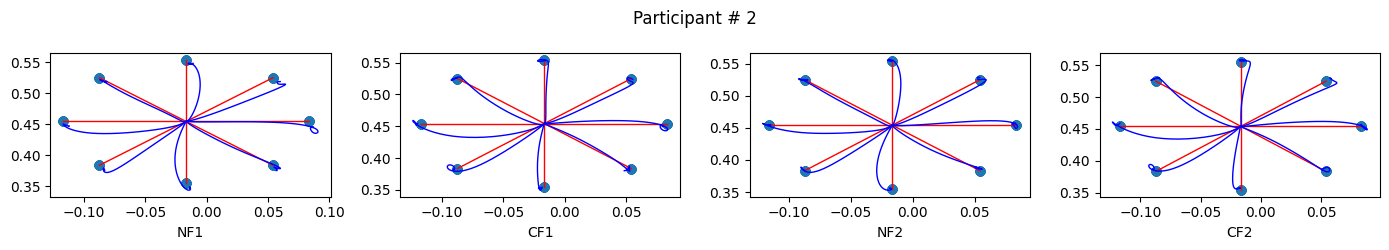

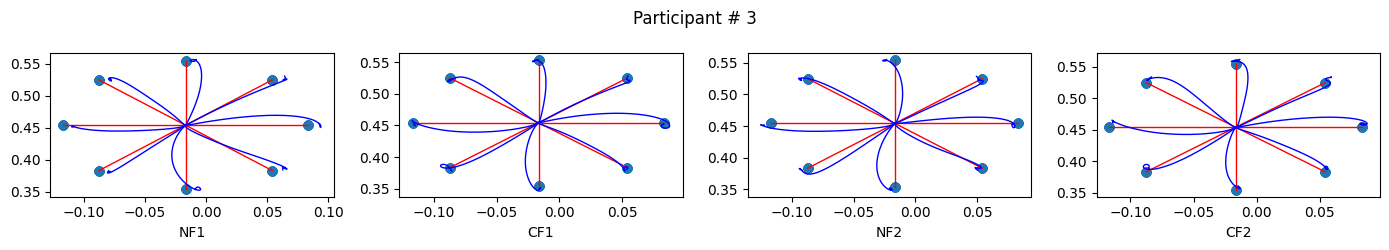

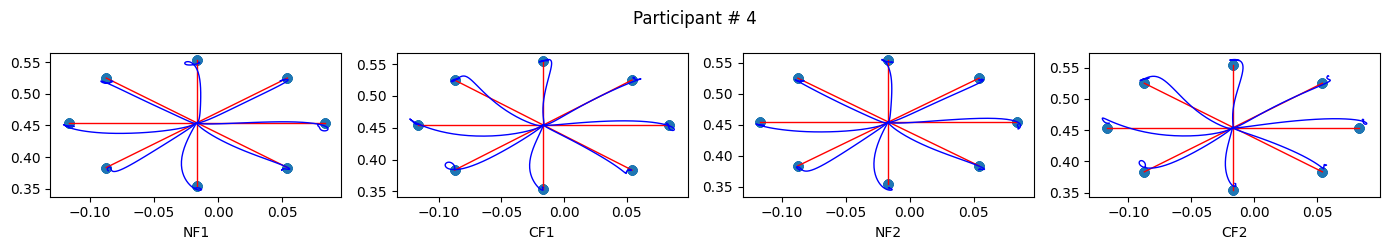

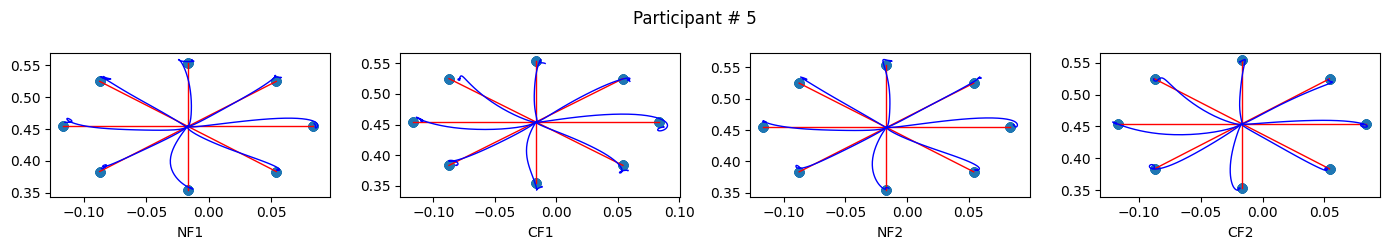

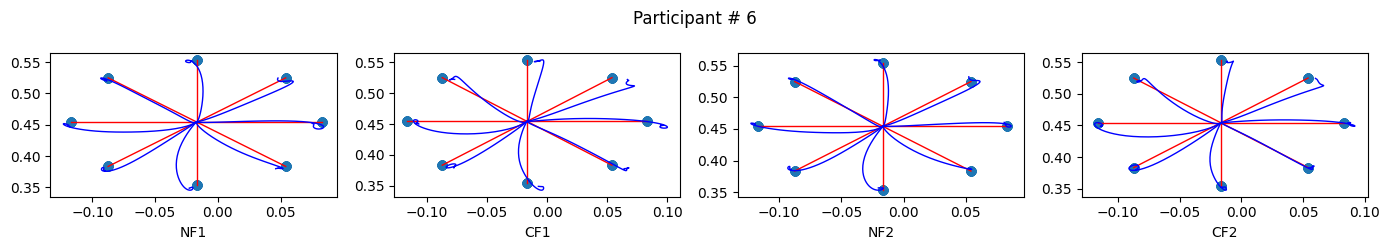

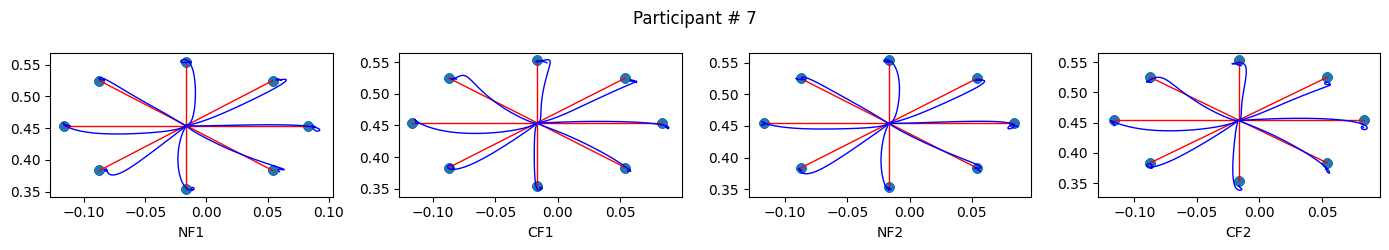

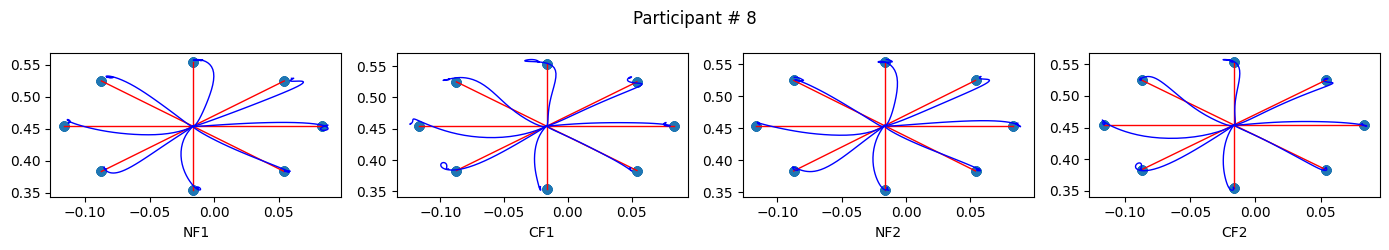

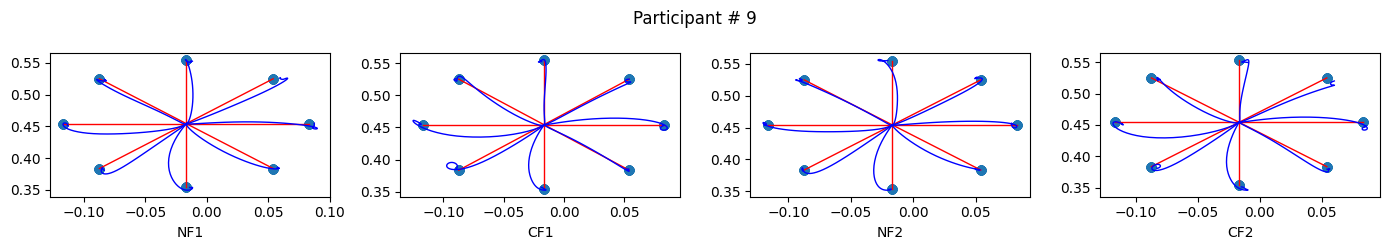

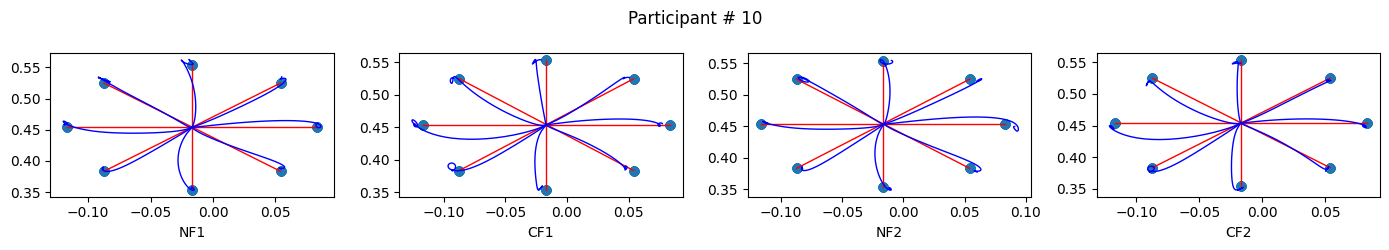

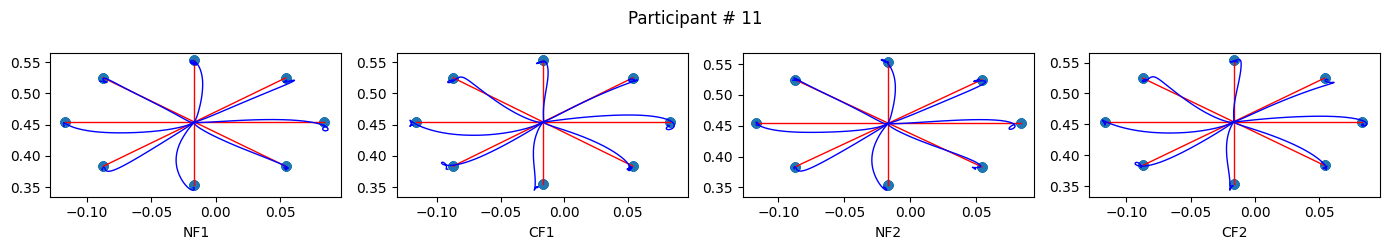

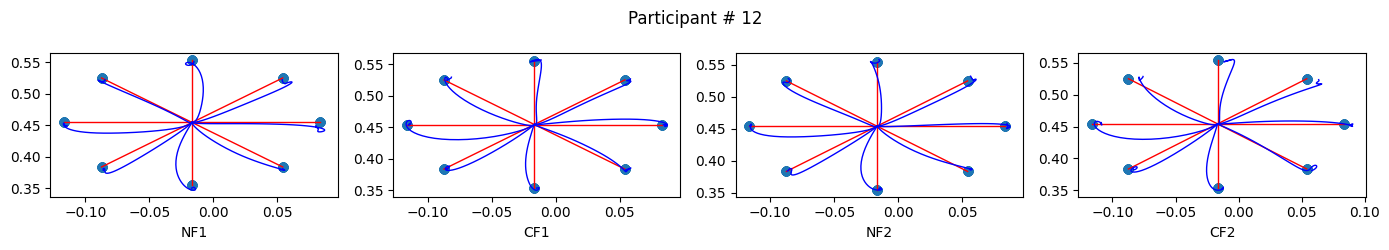

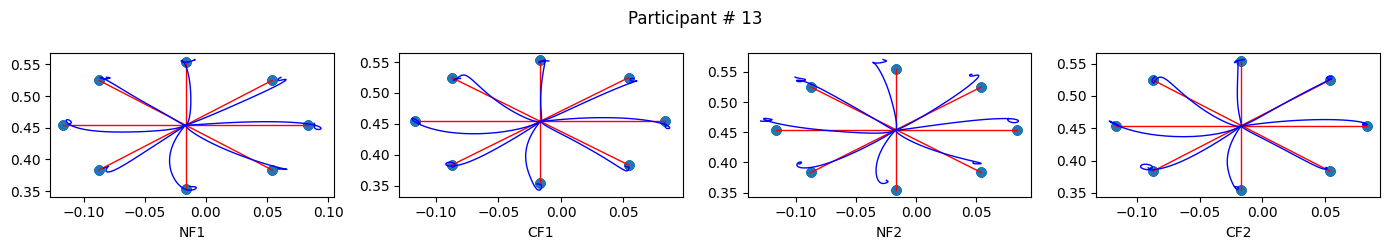

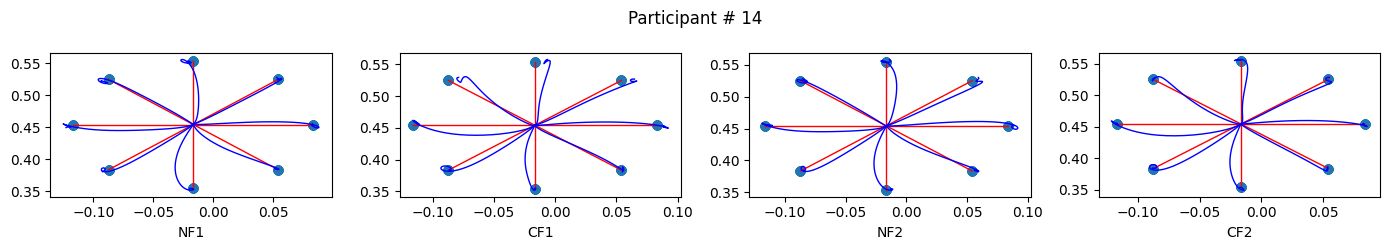

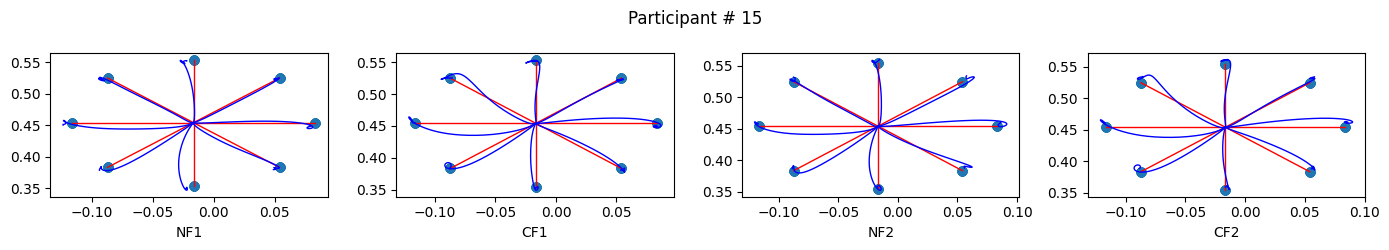

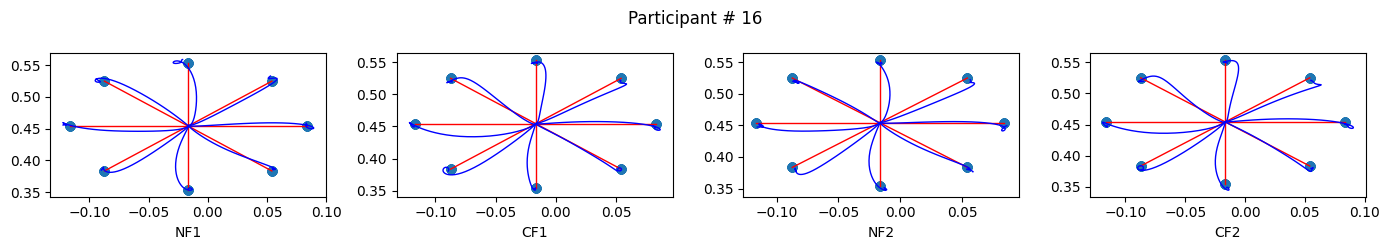

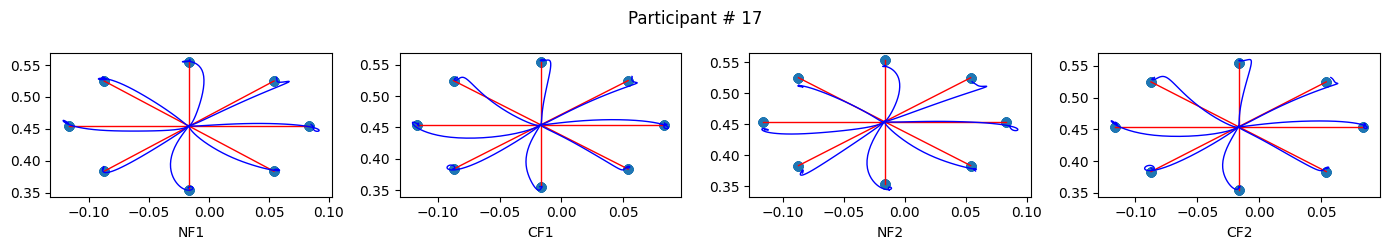

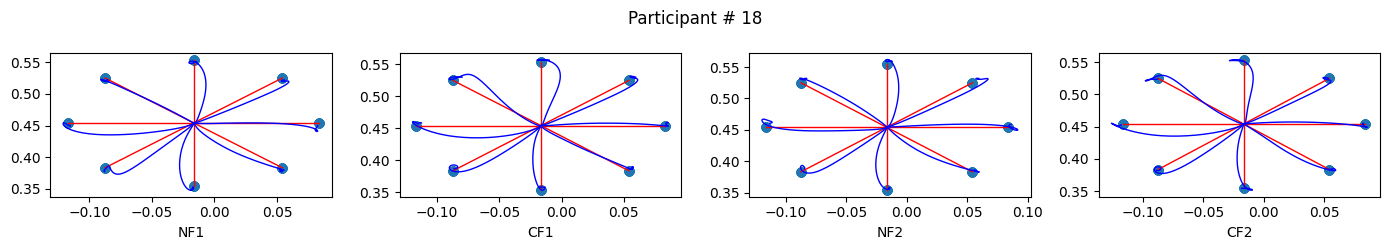

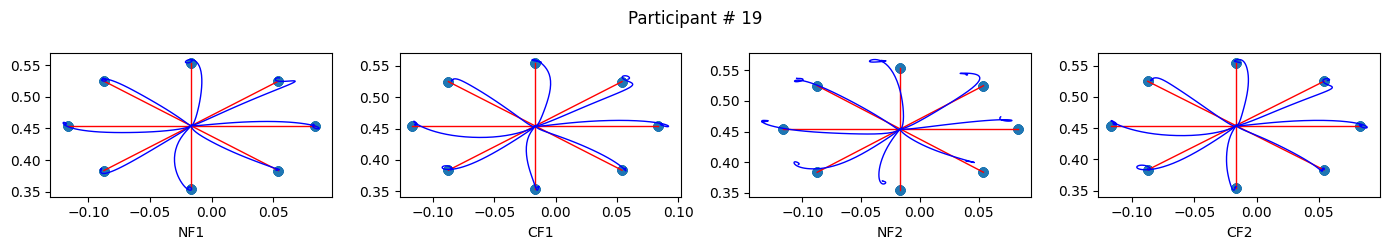

In [5]:
maxNF1 = []
maxCF1 = []
maxNF2 = []
maxCF2 = []

def stackVertically(bigArray, currentArray):
    if (len(bigArray) == 0):
        bigArray = currentArray
    else:
        bigArray = np.vstack((bigArray, currentArray))
    return bigArray


for i in range(20):
    resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 = openAllFilesForParticipant(i)
    plotCurvesForParticipant(i, resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 )
    
    deviationsNF1 = findDeviationFromStraightLine(targetsNF1, resultsNF1)
    deviationsCF1 = findDeviationFromStraightLine(targetsCF1, resultsCF1)
    deviationsNF2 = findDeviationFromStraightLine(targetsNF2, resultsNF2)
    deviationsCF2 = findDeviationFromStraightLine(targetsCF2, resultsCF2)

    listMaxNF1, listMaxCF1, listMaxNF2, listMaxCF2 = findMaxDeviationsForParticipant(deviationsNF1, deviationsCF1, deviationsNF2, deviationsCF2)

    maxNF1 = stackVertically(maxNF1, listMaxNF1)
    maxCF1 = stackVertically(maxCF1, listMaxCF1)
    maxNF2 = stackVertically(maxNF2, listMaxNF2)
    maxCF2 = stackVertically(maxCF2, listMaxCF2)

[0.02243243 0.00673145 0.0100432 ]
[0.01669786 0.01196039 0.0092246 ]
[0.02324739 0.01047548 0.0104975 ]
[0.0225147  0.01600816 0.01092553]
[0.03026872 0.01845625 0.0086565 ]
[0.02421085 0.01026132 0.00780239]
[0.02354073 0.00936181 0.00929489]
[0.01815858 0.0113328  0.00947209]
[0.02254953 0.01186205 0.0104213 ]
[0.04106293 0.07375011 0.01377081]
[0.02352667 0.0142135  0.00969612]
[0.01203543 0.00369074 0.00696949]
[0.03782881 0.03406973 0.01280162]
[0.02207347 0.02644274 0.00964466]
[0.02233674 0.0111983  0.00952708]
[0.01518483 0.0128289  0.01000347]
[0.03241076 0.02120727 0.00963558]
[0.02183537 0.00732363 0.00643531]
[0.01739219 0.01581475 0.01021073]
[0.04100714 0.03112846 0.01014094]
[0.01994529 0.00979924 0.00796223]
[0.02839468 0.01177444 0.00969206]
[0.02563564 0.01260664 0.00784759]
[0.02481855 0.0103258  0.00882298]
[0.02205584 0.01427639 0.01136718]
[0.02376459 0.02236401 0.01094685]
[0.01631887 0.0069944  0.00817423]
[0.02591055 0.01820152 0.01213649]
[0.02193045 0.014949

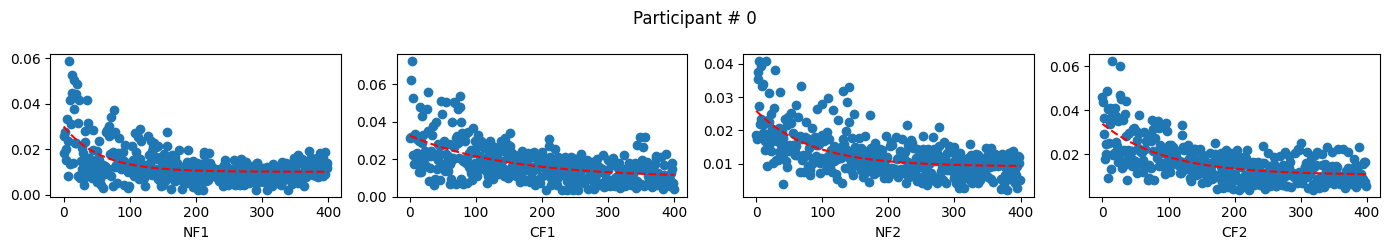

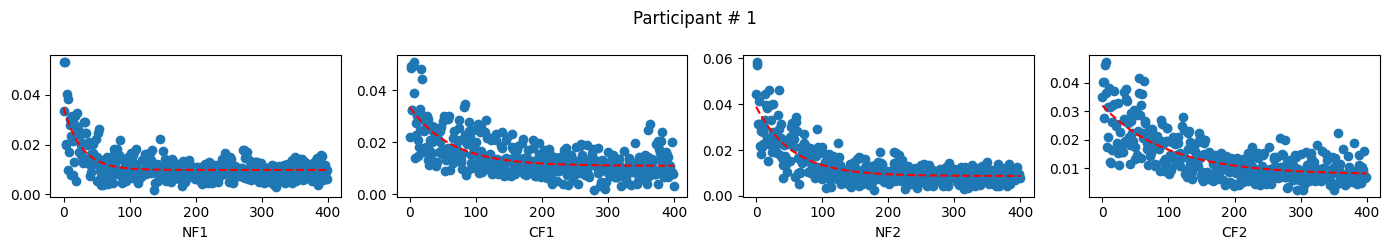

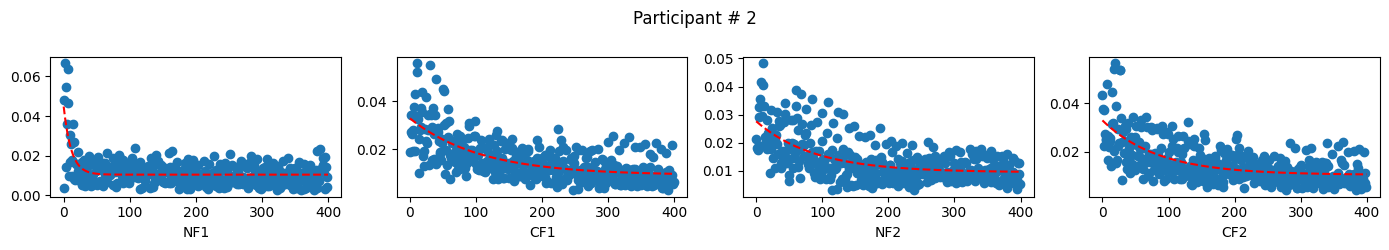

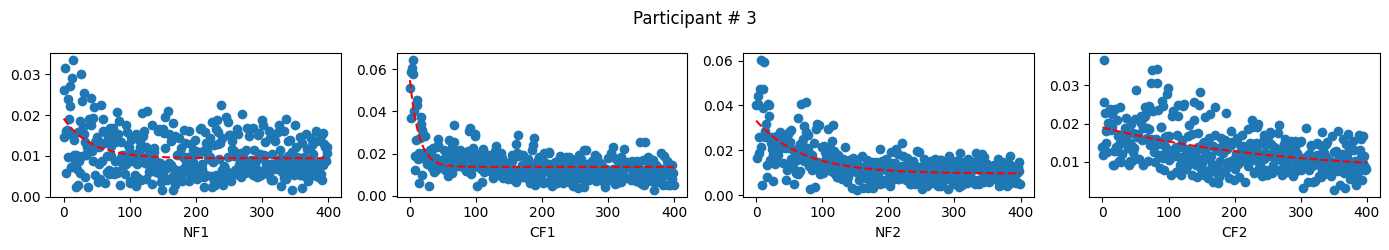

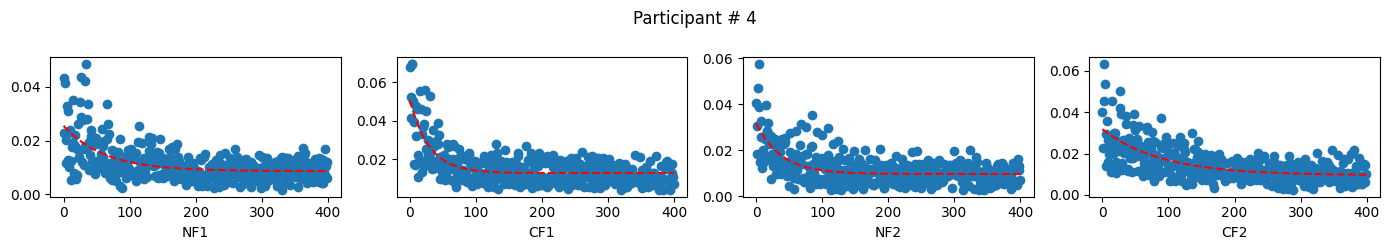

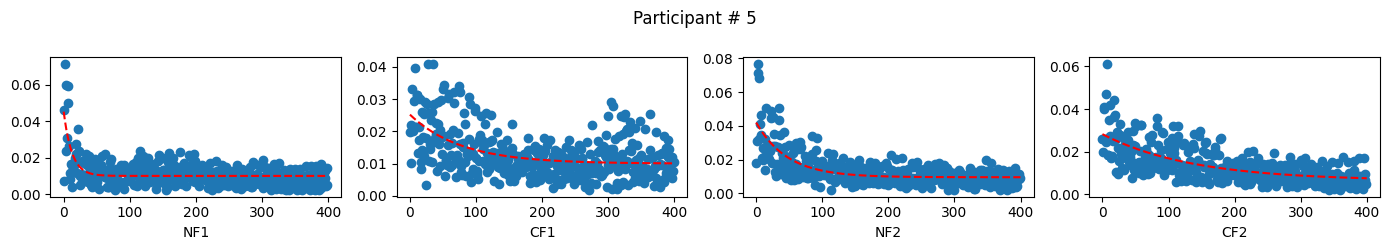

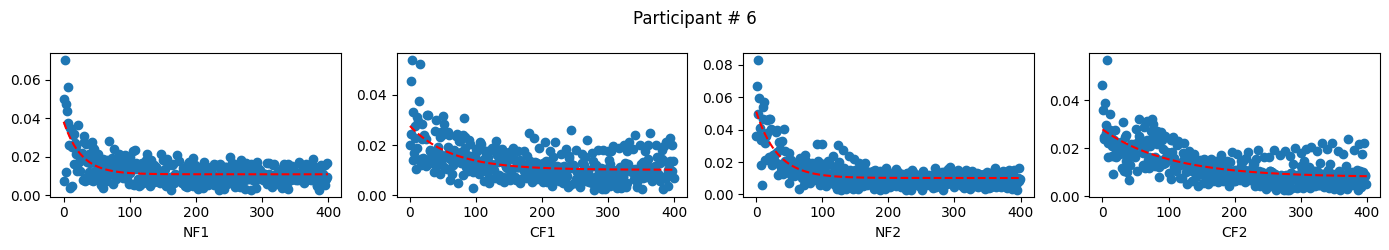

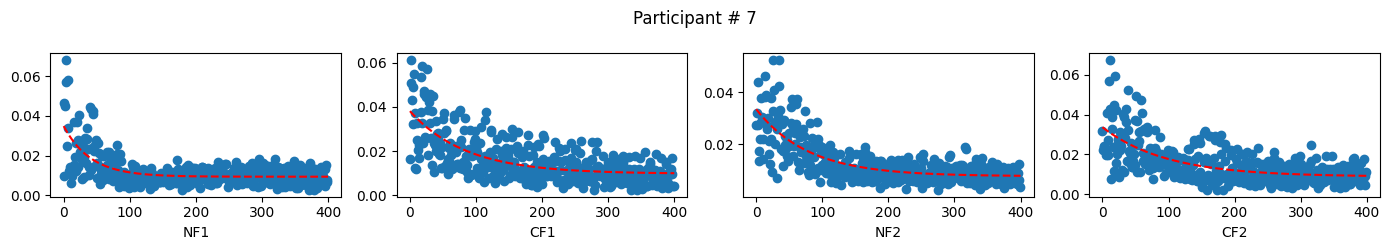

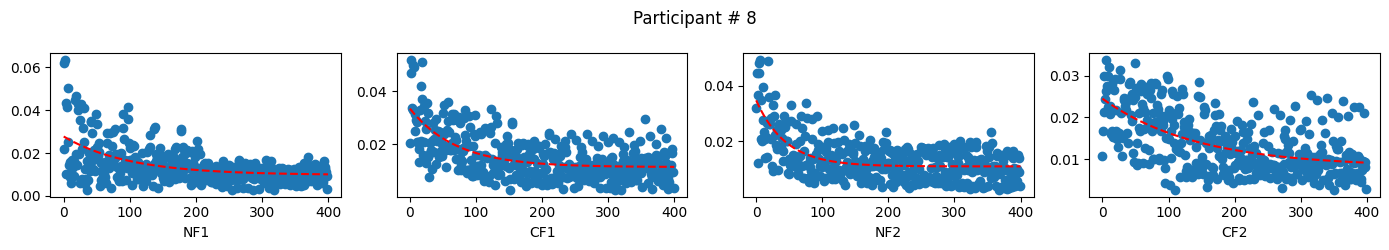

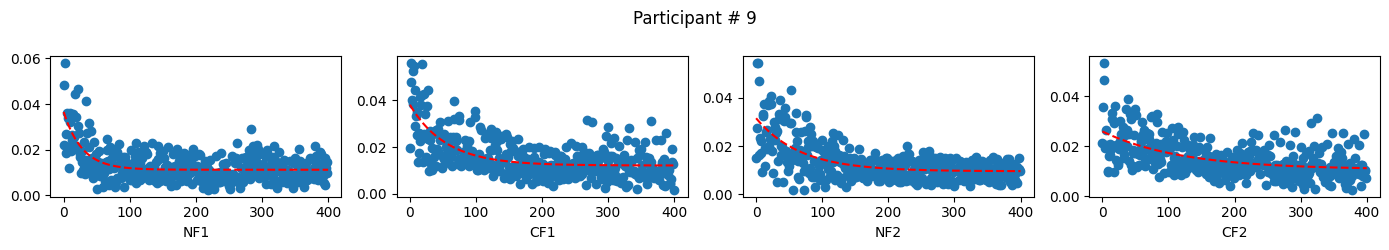

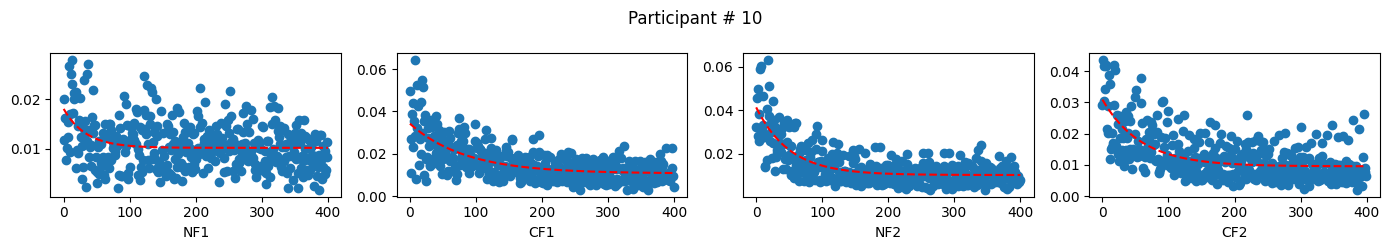

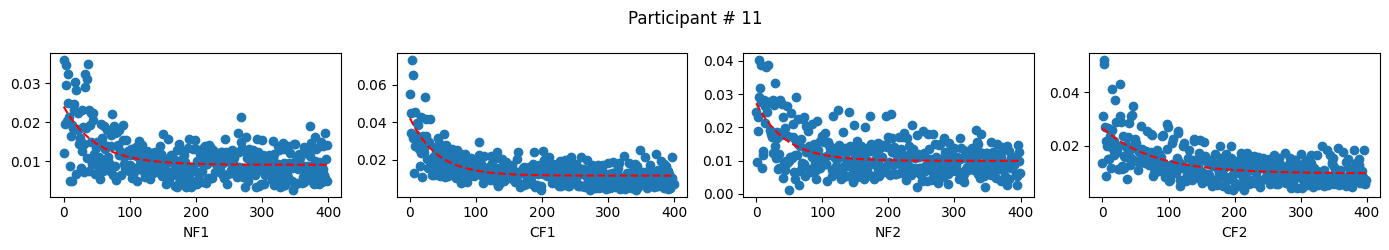

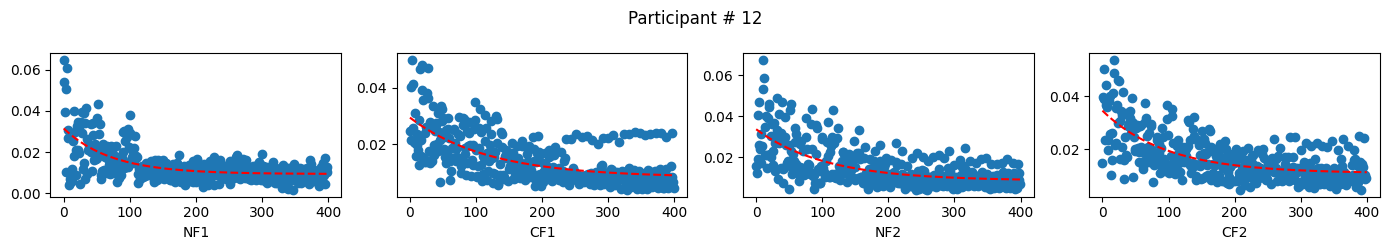

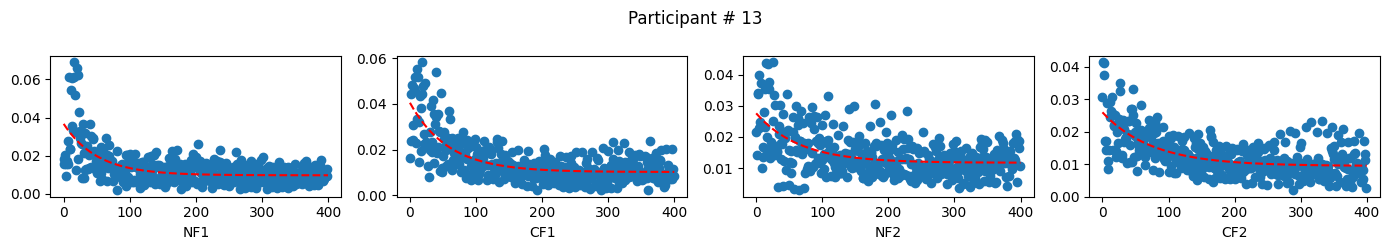

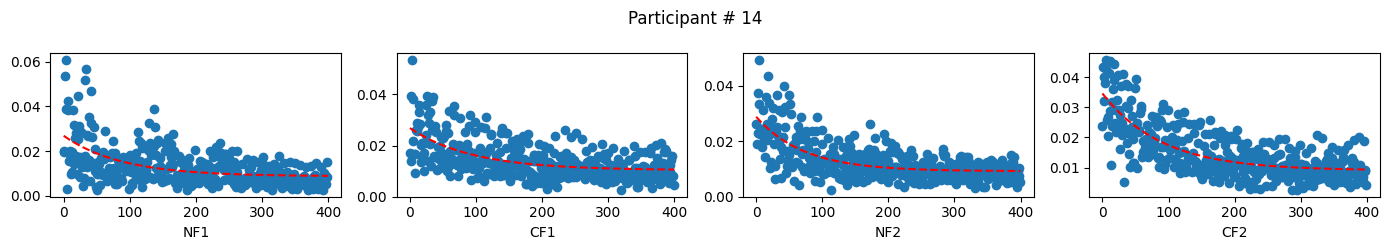

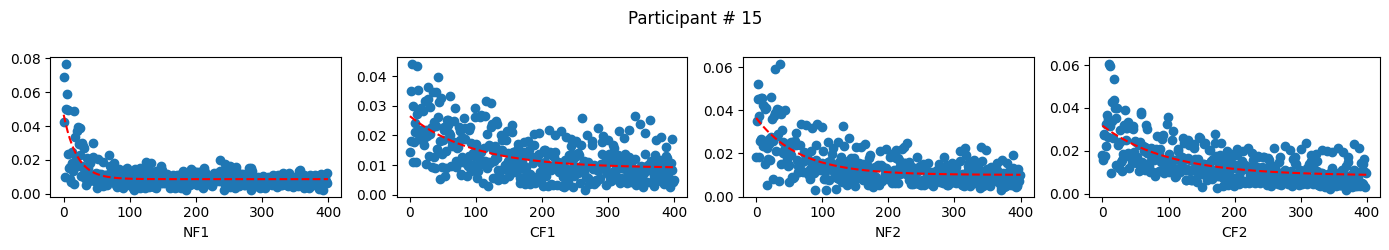

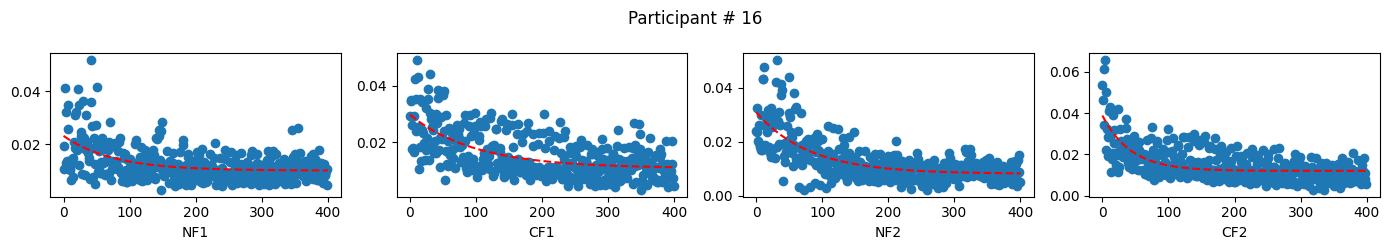

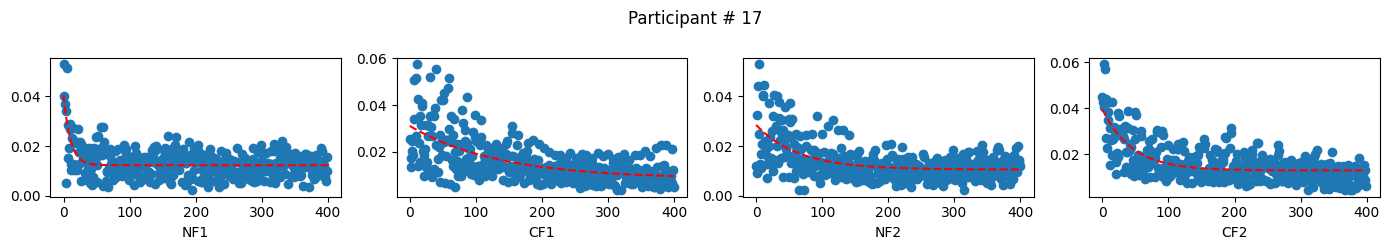

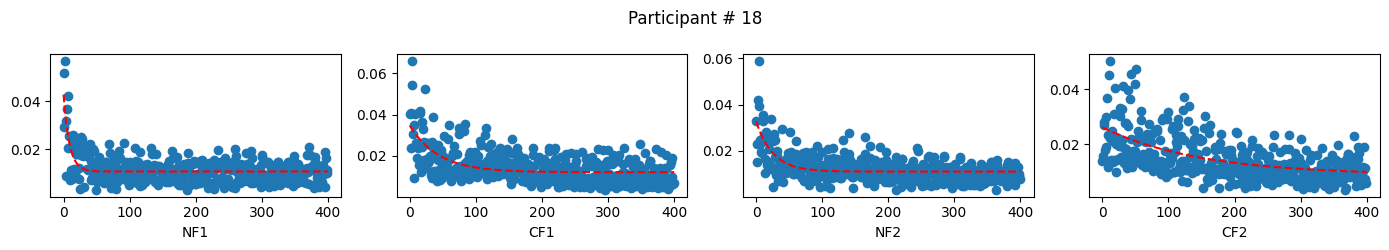

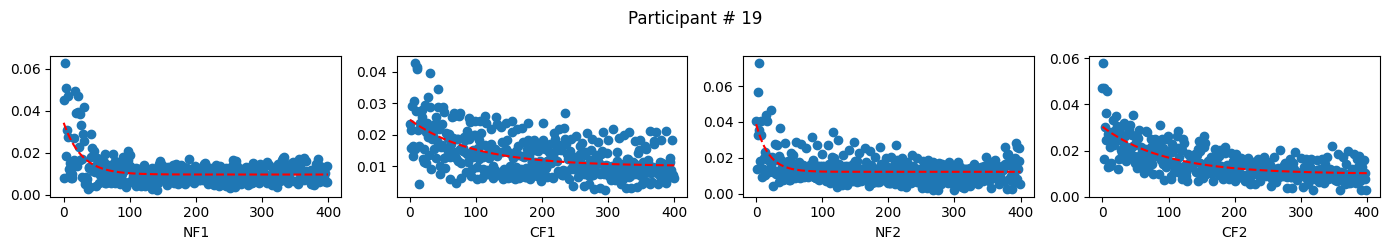

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

parametersPerParticipantNF1 = [0, 0, 0]
parametersPerParticipantCF1 = [0, 0, 0]
parametersPerParticipantNF2 = [0, 0, 0]
parametersPerParticipantCF2 = [0, 0, 0]

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

for i in range(20):
    currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2 = maxNF1[i], maxCF1[i], maxNF2[i], maxCF2[i]
    initialGuess = [0.02, 0.01, 0.01]

    # PLOTTING MAX
    plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

    plt.subplot(141)
    plt.scatter(range(len(currMaxNF1)), currMaxNF1)
    polyline = np.linspace(0, len(currMaxNF1), len(currMaxNF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF1, p0=initialGuess)
    parametersPerParticipantNF1 = np.vstack((parametersPerParticipantNF1, opt_params))
    A, K, C = opt_params
    #print(opt_params)
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('NF1')

    plt.subplot(142)
    plt.scatter(range(len(currMaxCF1)), currMaxCF1)
    polyline = np.linspace(0, len(currMaxCF1), len(currMaxCF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF1, p0=initialGuess)
    parametersPerParticipantCF1 = np.vstack((parametersPerParticipantCF1, opt_params))
    A, K, C = opt_params
    print(opt_params)
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('CF1')

    plt.subplot(143)
    plt.scatter(range(len(currMaxNF2)), currMaxNF2)
    polyline = np.linspace(0, len(currMaxNF2), len(currMaxNF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF2, p0=initialGuess)
    parametersPerParticipantNF2 = np.vstack((parametersPerParticipantNF2, opt_params))
    A, K, C = opt_params
    print(opt_params)
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('NF2')

    plt.subplot(144)
    plt.scatter(range(len(currMaxCF2)), currMaxCF2)
    polyline = np.linspace(0, len(currMaxCF2), len(currMaxCF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF2, p0=initialGuess)
    parametersPerParticipantCF2 = np.vstack((parametersPerParticipantCF2, opt_params))
    A, K, C = opt_params
    print(opt_params)
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "--", color="red")
    plt.xlabel('CF2')
    
    plt.suptitle("Participant # " + str(i))

In [7]:
#print(maxCF1[1, :])
np.save("postAnalysis/maxNF1", maxNF1)
np.save("postAnalysis/maxCF1", maxCF1)
np.save("postAnalysis/maxNF2", maxNF2)
np.save("postAnalysis/maxCF2", maxCF2)

np.save("postAnalysis/funcParametersNF1", parametersPerParticipantNF1)
np.save("postAnalysis/funcParametersCF1", parametersPerParticipantCF1)
np.save("postAnalysis/funcParametersNF2", parametersPerParticipantNF2)
np.save("postAnalysis/funcParametersCF2", parametersPerParticipantNF2)

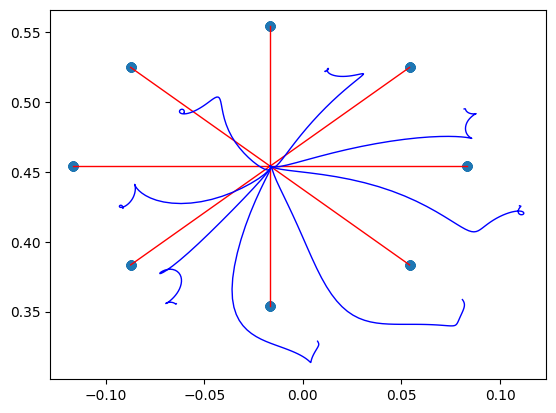

In [7]:
## visualize the curves per participant
import matplotlib.pyplot as plt
target_xy = targetsCF2 
xy = resultsCF2 ####
target_x = target_xy[:, -1, 0]
target_y = target_xy[:, -1, 1]
nmov,ntime,_ = np.shape(xy)

## resultsNF1, targetsNF1, resultsCF1, targetsCF1, resultsNF2, targetsNF2, resultsCF2, targetsCF2 

plt.figure()
for i in range(8):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)

#range(4, len(listMedians), 8)
for i in range(8):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)